In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.datasets import make_regression

from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
from sklearn.linear_model import lars_path
from sklearn.linear_model import LassoCV
from sklearn.linear_model import enet_path
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [147]:
X,y,coefs = make_regression(n_samples=30,n_features=23,n_informative=3,coef=True)
#X,y = make_classification(n_samples=30,n_features=20,n_informative=10,n_classes=2,n_redundant=5)

In [128]:
X = np.random.uniform(low=-0.5, high=0.5, size=(30,23))

s = np.ones((30,1))

error = np.random.rand()
error_corr = 0.01 * error

group1 = np.ones((30,9))
group2 = np.ones((30,9))
group3 = np.ones((30,9))

for row in range(group1.shape[0]):
    for column in range(group1.shape[1]):
        group1[row][column] *= X[row][0]
        group1[row][column] += error_corr
        
for row in range(group2.shape[0]):
    for column in range(group2.shape[1]):
        group2[row][column] *= X[row][1]
        group2[row][column] += error_corr
        
for row in range(group3.shape[0]):
    for column in range(group3.shape[1]):
        group3[row][column] *= X[row][2]
        group3[row][column] += error_corr

print(group1.shape)
X_data = np.insert(X, [1], group1, axis=1)
X_data = np.insert(X_data, [11], group2, axis=1)
X_data = np.insert(X_data, [21], group3, axis=1)

print(X_data.shape)

beta = np.zeros((50,1))
beta[0] = beta[10] = beta[20] = 1
#beta[1] = beta[2] = beta[3] = beta[4] = beta[5] = beta[6] = beta[7] = beta[8] = beta[9] = 1
#beta[19] = beta[11] = beta[12] = beta[13] = beta[14] = beta[15] = beta[16] = beta[17] = beta[18] = 1
#beta[21] = beta[22] = beta[23] = beta[24] = beta[25] = beta[26] = beta[27] = beta[28] = beta[29] = 1


print(beta.shape)
print(X.shape)
X_feat = X[:,0:3]

X_features = np.c_[X_feat, X[:,0],
                   X[:,1],
                   X[:,2],
                   X[:,2],
                   X[:,1],
                   X[:,0],
                   X[:,1]
                   ]

print("Features shape")
print(X_features.shape)
print(X_features)
y = -np.sign((X_data.dot(beta)))
#y0 = np.sign((X_data.dot(beta)))

y[y<1] = 0

print(y)
print(y0)
#y = (X.dot(beta)) + error
#y = np.random.rand(30,1)
#y[y<0.5] = -1
#y[y>=0.5] = 1

(30, 9)
(30, 50)
(50, 1)
(30, 23)
Features shape
(30, 10)
[[-0.48294125  0.07117278 -0.08598573 -0.48294125  0.07117278 -0.08598573
  -0.08598573  0.07117278 -0.48294125  0.07117278]
 [ 0.32852061  0.0903473  -0.2296142   0.32852061  0.0903473  -0.2296142
  -0.2296142   0.0903473   0.32852061  0.0903473 ]
 [ 0.23166545 -0.26998718 -0.45238581  0.23166545 -0.26998718 -0.45238581
  -0.45238581 -0.26998718  0.23166545 -0.26998718]
 [ 0.43853212  0.33770385 -0.19403051  0.43853212  0.33770385 -0.19403051
  -0.19403051  0.33770385  0.43853212  0.33770385]
 [ 0.48934013 -0.34559552 -0.44071067  0.48934013 -0.34559552 -0.44071067
  -0.44071067 -0.34559552  0.48934013 -0.34559552]
 [ 0.27793499 -0.02382546 -0.49439482  0.27793499 -0.02382546 -0.49439482
  -0.49439482 -0.02382546  0.27793499 -0.02382546]
 [ 0.21061418  0.0181404   0.0407024   0.21061418  0.0181404   0.0407024
   0.0407024   0.0181404   0.21061418  0.0181404 ]
 [-0.14391255 -0.44053291 -0.10084926 -0.14391255 -0.44053291 -0.1008

In [129]:
df = pd.DataFrame(X_data)

dfy = pd.DataFrame(y)
#df3 = pd.concat([df,dfy], axis=1)
#df3.sample(10)

df['output'] = y
df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,output
19,-0.434457,-0.429670,-0.429670,-0.429670,-0.429670,-0.429670,-0.429670,-0.429670,-0.429670,-0.429670,...,-0.458064,0.195347,-0.218625,0.258143,-0.468811,-0.366094,-0.468782,0.188030,-0.360644,1.0
11,-0.283709,-0.278923,-0.278923,-0.278923,-0.278923,-0.278923,-0.278923,-0.278923,-0.278923,-0.278923,...,0.288339,0.323490,-0.385777,-0.387880,-0.007395,-0.462513,0.251930,-0.116335,0.106057,1.0
21,0.266674,0.271461,0.271461,0.271461,0.271461,0.271461,0.271461,0.271461,0.271461,0.271461,...,0.381043,0.064469,0.026809,-0.456716,0.360286,0.497572,0.436597,-0.083296,0.398755,1.0
14,-0.192006,-0.187219,-0.187219,-0.187219,-0.187219,-0.187219,-0.187219,-0.187219,-0.187219,-0.187219,...,-0.399881,-0.182925,0.258562,0.364490,-0.081670,-0.404412,0.001302,-0.186161,-0.487899,1.0
13,0.243851,0.248638,0.248638,0.248638,0.248638,0.248638,0.248638,0.248638,0.248638,0.248638,...,0.111293,-0.489635,-0.408112,0.206597,0.371964,-0.192740,-0.092547,0.344126,-0.234741,0.0
20,0.495481,0.500267,0.500267,0.500267,0.500267,0.500267,0.500267,0.500267,0.500267,0.500267,...,0.125734,-0.104854,-0.224803,-0.176647,0.325303,0.141506,-0.288921,0.110980,-0.104951,0.0
27,0.063172,0.067959,0.067959,0.067959,0.067959,0.067959,0.067959,0.067959,0.067959,0.067959,...,0.051788,-0.458128,-0.274475,-0.381972,0.490736,0.491857,0.429546,0.484751,0.127746,0.0
6,0.210614,0.215401,0.215401,0.215401,0.215401,0.215401,0.215401,0.215401,0.215401,0.215401,...,-0.001438,-0.491657,-0.367613,0.306652,-0.045988,0.286465,0.473088,-0.434463,-0.352447,0.0
25,0.464419,0.469206,0.469206,0.469206,0.469206,0.469206,0.469206,0.469206,0.469206,0.469206,...,0.462043,-0.416197,0.114760,0.441578,0.455523,-0.015642,-0.064380,-0.092709,-0.185700,0.0
28,-0.421937,-0.417150,-0.417150,-0.417150,-0.417150,-0.417150,-0.417150,-0.417150,-0.417150,-0.417150,...,-0.032045,-0.087215,0.253712,0.130704,0.491581,0.061195,-0.432888,0.381310,0.303379,1.0


In [130]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,output
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.054536,0.059323,0.059323,0.059323,0.059323,0.059323,0.059323,0.059323,0.059323,0.059323,...,0.055100,-0.067688,0.025259,0.023596,0.006608,-0.035572,0.032939,0.014482,-0.081414,0.600000
std,0.332966,0.332966,0.332966,0.332966,0.332966,0.332966,0.332966,0.332966,0.332966,0.332966,...,0.260067,0.302831,0.301745,0.320977,0.347346,0.286446,0.309797,0.273982,0.244885,0.498273
min,-0.482941,-0.478155,-0.478155,-0.478155,-0.478155,-0.478155,-0.478155,-0.478155,-0.478155,-0.478155,...,-0.458064,-0.491657,-0.497236,-0.466241,-0.494295,-0.462513,-0.483323,-0.434463,-0.487899,0.000000
25%,-0.260784,-0.255997,-0.255997,-0.255997,-0.255997,-0.255997,-0.255997,-0.255997,-0.255997,-0.255997,...,-0.121236,-0.343850,-0.223258,-0.325974,-0.357623,-0.201180,-0.197027,-0.201712,-0.271012,0.000000
50%,0.148188,0.152975,0.152975,0.152975,0.152975,0.152975,0.152975,0.152975,0.152975,0.152975,...,0.025175,-0.096034,0.053733,0.067877,-0.027625,-0.074721,-0.030399,-0.049013,-0.111662,1.000000
75%,0.315874,0.320661,0.320661,0.320661,0.320661,0.320661,0.320661,0.320661,0.320661,0.320661,...,0.252127,0.178284,0.291485,0.294525,0.324763,0.123126,0.306694,0.184046,0.088485,1.000000
max,0.495481,0.500267,0.500267,0.500267,0.500267,0.500267,0.500267,0.500267,0.500267,0.500267,...,0.489816,0.476054,0.437990,0.498692,0.491581,0.497572,0.478654,0.484751,0.398755,1.000000


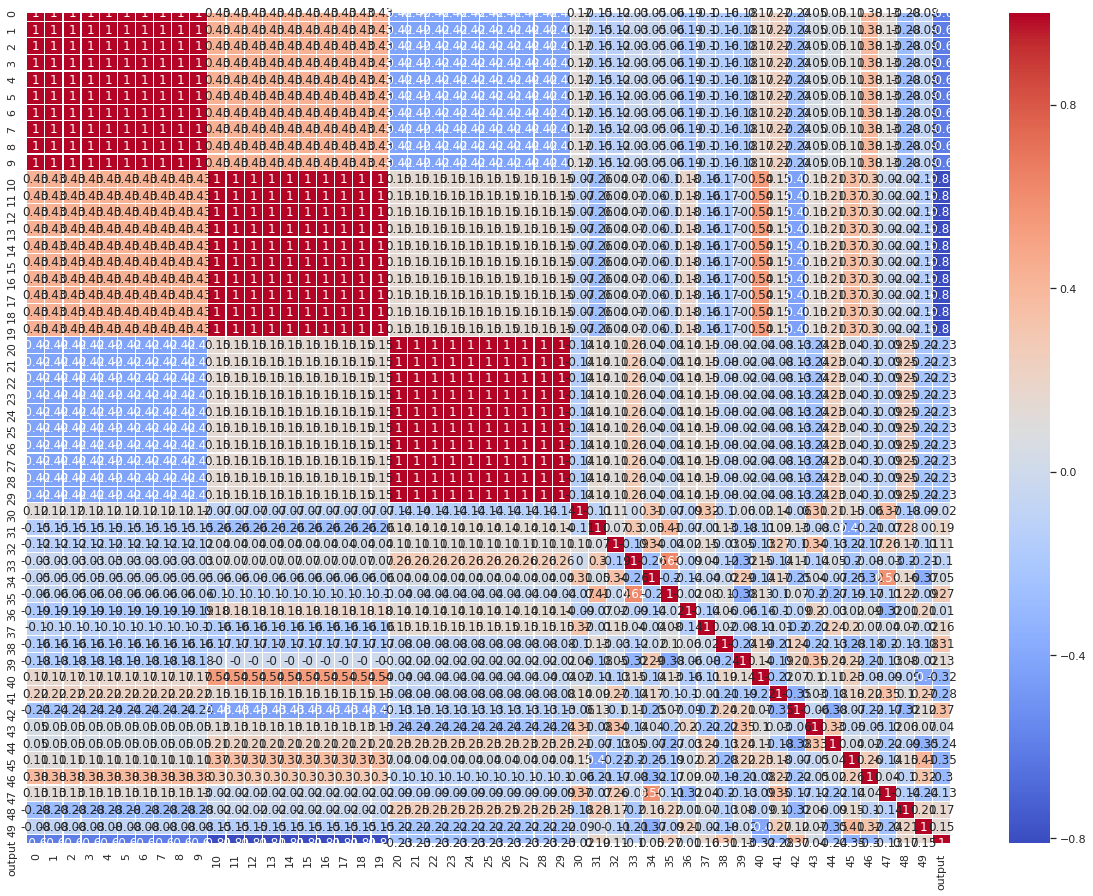

In [131]:
correlation_matrix = df.corr().round(2)
sns.set(rc={'figure.figsize':(20.7,15.27)})
ax = sns.heatmap(data=correlation_matrix, cmap='coolwarm', linewidths=.2, annot=True)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_data,y,test_size=0.2,random_state=5)

scaler = StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

In [68]:
def alphal1ratio_to_taumu(alpha, l1_ratio):
    tau = alpha*l1_ratio
    mu = (tau - alpha) / 2
    
    return tau, mu

def taumu_to_alphal1ratio(tau, mu):
    alpha = 2*mu + tau
    l1_ratio = tau/alpha
    return alpha, l1_ratio

In [137]:
mu = 0.1
#taus = np.logspace(-1,-4,5)
taus = np.linspace(0.1,0.9,10)

alphas = []
l1_ratios = []

for tau in taus:
    alpha, l1_ratio = taumu_to_alphal1ratio(tau, mu)
    alphas.append(alpha)
    l1_ratios.append(l1_ratio)
    
#alphas = np.linspace(1,10,20)
#alphas = np.linspace(0.0001,0.9999,20)
#l1_ratios = np.linspace(0.0001,0.9999,20)

print(alphas)
print(l1_ratios[0])

tuned_parameters = [{'alpha': alphas, 'l1_ratio': l1_ratios}]

enet = ElasticNet(max_iter = 1000)

scores = []
coefs_found = []
best_params = []

K = 3
kf = StratifiedKFold(n_splits=K, shuffle=True)
kf.get_n_splits(X_data,y)
for train_index, test_index in kf.split(X_data, y):
    x_train, x_test = X_data[train_index], X_data[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = GridSearchCV(enet, tuned_parameters, cv=5)
    clf.fit(x_train, y_train)

    coefs = clf.best_estimator_.coef_
    params = clf.best_params_
    score = clf.score(x_test, y_test)

    print(coefs)
    #coefs_found += list(coefs)
    coefs_found.append(coefs)
    best_params.append(params) 
    scores.append(score)
    
max_score_index = np.where(scores == np.amax(scores))

print("Best parameters after cross validation with u1")
print(best_params[max_score_index[0][0]])

cfs = np.asarray(coefs_found[max_score_index[0][0]])
numCoefs1 = np.array(cfs[cfs != 0])
print(numCoefs1.shape)

max_score_index

[0.30000000000000004, 0.3888888888888889, 0.4777777777777778, 0.5666666666666667, 0.6555555555555557, 0.7444444444444445, 0.8333333333333333, 0.9222222222222223, 1.011111111111111, 1.1]
0.3333333333333333
[-0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.0137832  -0.01378368
 -0.01378408 -0.01378431 -0.01378432 -0.01378412 -0.01378381 -0.01378347
 -0.0137832  -0.01378308 -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.         -0.          0.          0.
 -0.          0.          0.          0.         -0.         -0.
  0.          0.         -0.         -0.         -0.         -0.
  0.          0.        ]
[-0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.02515431 -0.02515526
 -0.02515645 -0.02515749 -0.02515811 -0.02515816 -0.02515767 -0.02515684
 -0.02515594 -0.025155

(array([1]),)

In [41]:
def nested_split(mu):
    taus = np.logspace(-1,5,5)

    alphas = []
    l1_ratios = []
    #alphas = np.logspace(-0.01, -0.7, 5)
    #l1_ratio = np.logspace(-0.01,-0.7,5)

    for tau in taus:
        alpha, l1_ratio = taumu_to_alphal1ratio(tau, mu)
        alphas.append(alpha)
        l1_ratios.append(l1_ratio)

    tuned_parameters = [{'alpha': alphas, 'l1_ratio': l1_ratios}]

    enet = ElasticNet(max_iter = 1000)

    scores = []
    coefs_found = []
    best_params = []

    K = 3
    kf = StratifiedKFold(n_splits=K, shuffle=True)
    kf.get_n_splits(X_data,y)
    for train_index, test_index in kf.split(X_data, y):
        x_train, x_test = X_data[train_index], X_data[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf = GridSearchCV(enet, tuned_parameters, cv=5)
        clf.fit(x_train, y_train)

        coefs = clf.best_estimator_.coef_
        params = clf.best_params_
        score = clf.score(x_test, y_test)

        #coefs_found += list(coefs)
        coefs_found.append(coefs)
        best_params.append(params) 
        scores.append(score)

    
    return best_params, scores, coefs_found

In [42]:
best_params1, scores1, coefs1 = nested_split(1e5)
best_params2, scores2, coefs2 = nested_split(1e9)
best_params3, scores3, coefs3 = nested_split(1e11)

max_score_index1 = np.where(scores1 == np.amax(scores1))

print("Best parameters after cross validation with u1")
print(best_params1[max_score_index1[0][0]])

max_score_index2 = np.where(scores2 == np.amax(scores2))

print("Best parameters after cross validation with u2")
print(best_params2[max_score_index2[0][0]])

max_score_index3 = np.where(scores3 == np.amax(scores3))

print("Best parameters after cross validation with u3")
print(best_params3[max_score_index3[0][0]])

cf1 = np.asarray(coefs1[max_score_index1[0][0]])
cf2 = np.asarray(coefs2[max_score_index2[0][0]])
cf3 = np.asarray(coefs3[max_score_index3[0][0]])

print(cf1.shape)
print(cf2.shape)
print(cf3.shape)

numCoefs1 = np.array(cf1[cf1 != 0])
numCoefs2 = np.array(cf2[cf2 != 0])
numCoefs3 = np.array(cf3[cf3 != 0])

print(numCoefs1.shape)
print(numCoefs2.shape)
print(numCoefs3.shape)

/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationW

Best parameters after cross validation with u1
{'alpha': 200000.1, 'l1_ratio': 1.581113830479468e-05}
Best parameters after cross validation with u2
{'alpha': 2000000000.1, 'l1_ratio': 1.5811388275841898e-09}
Best parameters after cross validation with u3
{'alpha': 200000000000.1, 'l1_ratio': 1.5811388300591898e-11}
(50,)
(50,)
(50,)
(0,)
(0,)
(0,)


/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [113]:
best_cv_params = best_params1[max_score_index1[0][0]]
alpha =  best_cv_params['alpha']
l1_ratio = best_cv_params['l1_ratio']

tau, mu = alphal1ratio_to_taumu(alpha, l1_ratio)

print(alpha)
print(l1_ratio)
print(tau)
print(mu)

200000.1
4.99999750000125e-07
0.09999999999999999
-100000.0


In [81]:
def nested_split(tau, mu):
    alpha, l1_ratio = taumu_to_alphal1ratio(tau, mu)
    
    enet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter = 10000)
    enet.fit(X, y)

    numCoefs = np.array(enet.coef_[enet.coef_!= 0])
    print(enet.coef_)
    print(numCoefs)

In [82]:
nested_split(tau, 1e5)

[ 0.00000000e+00 -1.78682389e-06  2.11223242e-07  0.00000000e+00
 -4.79926034e-07 -0.00000000e+00  4.24082329e-07  6.75257490e-07
 -0.00000000e+00  1.96628586e-06 -1.24355649e-06 -4.31923327e-07
 -0.00000000e+00  7.05924122e-07  2.38103409e-07  2.32504777e-07
  1.67708504e-07 -0.00000000e+00  0.00000000e+00  0.00000000e+00]
[-1.78682389e-06  2.11223242e-07 -4.79926034e-07  4.24082329e-07
  6.75257490e-07  1.96628586e-06 -1.24355649e-06 -4.31923327e-07
  7.05924122e-07  2.38103409e-07  2.32504777e-07  1.67708504e-07]


<h1>Test Paper</h1>

In [180]:
mu = 1e4
taus = np.logspace(-1,-4,5)

alphas = []
l1_ratios = []

for tau in taus:
    alpha, l1_ratio = taumu_to_alphal1ratio(tau, mu)
    alphas.append(alpha)
    l1_ratios.append(l1_ratio)

tuned_parameters = [{'alpha': alphas, 'l1_ratio': l1_ratios}]

enet = ElasticNet(max_iter = 1000)

scores = []
coefs_found = []
best_params = []

K = 3
kf = StratifiedKFold(n_splits=K, shuffle=True)
kf.get_n_splits(X_data,y)
for train_index, test_index in kf.split(X_data, y):
    x_train, x_test = X_data[train_index], X_data[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = GridSearchCV(enet, tuned_parameters, cv=5)
    clf.fit(x_train, y_train)

    coefs = clf.best_estimator_.coef_
    params = clf.best_params_
    score = clf.score(x_test, y_test)

    print(coefs)
    #coefs_found += list(coefs)
    coefs_found.append(coefs)
    best_params.append(params) 
    scores.append(score)
    
max_score_index = np.where(scores == np.amax(scores))

print("Best parameters after cross validation with u1")
print(best_params[max_score_index[0][0]])

cfs = np.asarray(coefs_found[max_score_index[0][0]])
numCoefs1 = np.array(cfs[cfs != 0])
print(numCoefs1.shape)

/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[ 1.71463788e-06  1.71463788e-06  1.71463788e-06  1.71463788e-06
  1.71463788e-06  1.71463788e-06  1.71463788e-06  1.71463788e-06
  1.71463788e-06  1.71463788e-06 -3.36984930e-06 -3.36984930e-06
 -3.36984930e-06 -3.36984930e-06 -3.36984930e-06 -3.36984930e-06
 -3.36984930e-06 -3.36984930e-06 -3.36984930e-06 -3.36984930e-06
  3.16898015e-06  3.16898015e-06  3.16898015e-06  3.16898015e-06
  3.16898015e-06  3.16898015e-06  3.16898015e-06  3.16898015e-06
  3.16898015e-06  3.16898015e-06 -8.36332258e-06 -1.01958355e-06
  3.59870802e-06  3.38865393e-07  2.62954051e-06  1.70284873e-06
 -3.91597250e-06 -4.36665274e-06 -1.38160292e-06  2.71407005e-06
  2.97041407e-06  1.81254460e-06  9.09327817e-07  4.11900930e-06
 -4.49988080e-06  6.44474615e-06 -2.49569890e-06  8.39226666e-07
  1.88363143e-06 -7.53146234e-06]
[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.0000

/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [42]:
alpha = 0.7
enet = ElasticNet(alpha=alpha, l1_ratio=0.3)
enet.fit(x_train, y_train)
print(enet.coef_)

[-0.03077516 -0.03078191 -0.0307877  -0.03079064 -0.03078991 -0.03078594
 -0.03078026 -0.03077486 -0.03077156 -0.03077133 -0.03003016 -0.03003172
 -0.030031   -0.03002817 -0.03002413 -0.0300202  -0.0300177  -0.03001751
 -0.03001973 -0.03002366 -0.00474391 -0.00474331 -0.00474236 -0.00474135
 -0.00474057 -0.00474025 -0.00474048 -0.00474119 -0.00474215 -0.00474308
  0.         -0.         -0.          0.         -0.         -0.
  0.          0.         -0.         -0.         -0.          0.
 -0.         -0.          0.         -0.          0.00253087 -0.
  0.         -0.03395082]


In [175]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
print(lasso.coef_)

[-0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.00033605 -0.05602962  0.         -0.02197813 -0.         -0.
 -0.         -0.         -0.11963292  0.          0.          0.01624038
 -0.          0.         -0.25587936  0.23879543 -0.22492346  0.
  0.30297388 -0.1759801 ]


In [229]:
alphas = np.logspace(-5, 1, 60)
print(alphas[59])
enet = linear_model.ElasticNet(l1_ratio=0.5, max_iter=10000)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(x_train, y_train)
    train_errors.append(enet.score(x_train, y_train))
    test_errors.append(enet.score(x_test, y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# Estimate the coef_ on full data with optimal regularization parameter
enet.set_params(alpha=alpha_optim)
coef_ = enet.fit(x_train, y_train).coef_
print(coef_)

10.0


/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002945449781169924, tolerance: 0.001980952380952381
  positive)
/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002713638446564689, tolerance: 0.001980952380952381
  positive)
/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0024052439063265933, tolerance: 0.001980952380952381
  positive)
/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn

Optimal regularization parameter : 0.37693909753883637
[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.
 -0. -0. -0.  0.  0.  0. -0.  0. -0.  0. -0.  0.  0. -0.]
